# Aqueous Speciation

### User options

In [1]:
# User options -----------------------------------------------------------------

# input
input_filename <- "input_example.csv" # name of input file
db <- "jus" # which thermo database to use? Default is 'jus'.

# redox options:
redox_flag  <-  0     # -3, -2, -1, 0, or 1 (see EQ3 documentation for more info)
redox_aux <- "Fe+3"   # ignored unless redox_flag is 1. Input species, e.g. "Fe+3"
default_logfO2 <- -6  # what is the default logfO2 if a redox value can't be found?

# aqueous block options
exclude <- c("Year", "Area")  # which columns in input file to exclude from aqueous block?
suppress <- c()  # which species to suppress in aqueous block?

# charge balance options
charge_balance_on <- "none"  # "none" for no charge balance. Otherwise, "H+" or "Na+", etc.

# EQ3_Batch options
suppress_missing <- TRUE         # suppress the formation of an aqueous species if it is missing a value in the input file?
verbose <- 1                     # 2 for all messages, 1 for errors or warnings only, 0 for silent
create_join <- TRUE              # join all forms of output together into one csv?
report_filename <- "report.csv"  # filename of output report, e.g. "report.csv"
csv_filename <- "input_processed.csv" # filename of input summary?

# aqueous distributions and contributions
get_aq_dist  <- TRUE            # extract aqueous distributions after EQ3 output files are generated?
aq_dist_type <- "log_activity"  # can be "molality", "log_molality", "log_gamma", or "log_activity"
get_aq_contrib  <- TRUE        # extract aqueous contributions after EQ3 output files are generated?
aq_contrib_other <- TRUE       # include an "other" species for the sake of summing percents to 100?

# mineral saturation
get_mineral_sat <- TRUE         # extract mineral saturation affinities after EQ3 output files are generated?
mineral_sat_type <- "affinity"  # can be "logQoverK" or "affinity"

# redox
get_redox <- TRUE   # extract redox information after EQ3 output files are generated?
redox_type <- "Eh"  # Can be "Eh", "pe", "logfO2", or "Ah"

# affinity and energy supply
get_affinity_energy <- TRUE           # calculate reaction affinities and energy supplies after EQ3 output files are generated?
rxn_filename <- "rxns.txt"            # file containing reactions of interest for affinity and energy supply calculations
not_limiting <- c("H+", "OH-", "H2O") # which species should not be considered limiting reactants?

# charge balance
get_charge_balance <- TRUE  # extract charge balance information after EQ3 output files are generated? Mines ionic strength and charge balance results.

# database options
custom_db <- FALSE  # supplying a custom data0 file? TRUE or FALSE. Custom 3 letter code should be assigned to variable db, above.
batch_3o_filename <- paste0("batch_3o_", db, ".rds")  # name of file where batch_3o object will be saved. Must have an .rds extension.

# Create EQ3 input files

In [2]:
source("/home/shock/repos/batch_eq3/preprocess_for_EQ3.r")

[1] "Warning: no 'logfO2' column found. Attempting to find a column for aqueous O2 to estimate logfO2 at sample temperature and pressure..."
[1] "Warning: non-numeric aqueous O2 value in sample Crater Hills Geyser. Resorting to using Log fO2 (log bars) with a value of -6"
[1] "Done! Took 0.4 seconds."
[1] "Code was last updated on August 24, 2020"


# Run EQ3

In [3]:
source("/home/shock/repos/batch_eq3/runEQ3Batch.r")

calling EQ3 on Crater.Hills.Geyser.3i using jus

calling EQ3 on Gas.Crack.3i using jus

calling EQ3 on Spray.Geyser.Source.3i using jus

calling EQ3 on Bison.Pool.3i using jus

calling EQ3 on Snail.3i using jus

calling EQ3 on Ambergris.3i using jus

calling EQ3 on MLS.Source.3i using jus



[1] "runEQ3Batch finished! Took 1.5 seconds."


In [4]:
source("/home/shock/repos/batch_eq3/3o_mine.r")

[1] "Now processing EQ3 output files..."


Processing EQ3 output for Ambergris

Processing EQ3 output for Bison Pool

Processing EQ3 output for Crater Hills Geyser

Processing EQ3 output for Gas Crack

Processing EQ3 output for MLS Source

Processing EQ3 output for Snail

Processing EQ3 output for Spray Geyser Source



[1] "Finished processing EQ3 output files..."
[1] "Now processing aqueous contribution data..."


Processing aqueous contribution of Ambergris...

Processing aqueous contribution of Bison Pool...

Processing aqueous contribution of Crater Hills Geyser...

Processing aqueous contribution of Gas Crack...

Processing aqueous contribution of MLS Source...

Processing aqueous contribution of Snail...

Processing aqueous contribution of Spray Geyser Source...



[1] "Finished processing aqueous contribution data..."
Time difference of 0.1124804 secs
[1] "Finished mining .3o files. Time elapsed: 4.43467307090759"


In [5]:
# read the first few lines of the report
head(batch_3o[["report"]])

,Year_NA,Area_,H+_pH,Temperature_degC,HCO3-_Molality,"O2,AQ_Molality",HS-_Molality,"SiO2,AQ_Molality","METHANE,AQ_Molality","H2,AQ_Molality",...,r_5_affinity,r_6_affinity,r_7_affinity,r_1_energy,r_2_energy,r_3_energy,r_4_energy,r_5_energy,r_6_energy,r_7_energy
Bison Pool,2014,YNP,7.640,92.2,0.005690000,9.38e-06,3.49e-06,6.27e-03,0.00e+00,0.00000e+00,...,NA,NA,NA,0.617657,NA,NA,NA,NA,NA,NA
Spray Geyser Source,2012,YNP,8.021,92.9,0.005410000,3.13e-06,3.62e-06,5.03e-03,0.00e+00,0.00000e+00,...,10206.12,11775.77,-11775.72,0.275215192,NA,NA,NA,0.127780560,0.006076295,-3.664604969
Crater Hills Geyser,2012,YNP,3.327,89.0,0.000117000,0.00e+00,1.74e-05,1.44e-02,0.00e+00,0.00000e+00,...,NA,11220.11,-11220.25,NA,NA,NA,NA,NA,0.000059463,-82.042174368
Ambergris,2011,Iceland,8.452,81.5,0.000983000,5.31e-05,3.01e-05,2.48e-03,8.90e-09,3.97000e-08,...,10565.89,12224.88,-12224.73,4.840814151,0.001851129,0.001133001,0.001654551,1.217181747,0.070708732,-1.408279256
MLS Source,2007,YNP,7.850,94.0,0.006784681,7.19e-06,1.78e-06,4.20e-03,0.00e+00,0.00000e+00,...,NA,NA,NA,0.3126956,NA,NA,NA,NA,NA,NA
Gas Crack,2014,Oman,11.670,32.2,0.000033300,3.44e-05,6.24e-06,1.38e-06,1.75e-05,2.26129e-04,...,11533.59,12583.16,-12584.09,1.20392142,3.75749745,NA,3.48858642,1.58702215,0.01620711,-0.22890955


# Demonstration of new features

### Load a previous batch_3o dataset

In [6]:
batch_3o <- readRDS(file=batch_3o_filename)
names(batch_3o)

[1] "sample_data"     "aq_contrib"      "report"          "input"          
[5] "input_processed"

### Plot Demo

Create a speciation barplot for bicarbonate

In [7]:
library(dplyr)

set.seed(23151813) # set a random seed

this_basis <- "Fe+2"
df_spec <- batch_3o[["aq_contrib"]] %>%
    filter(basis==this_basis)

df_spec[, "molality"] <- as.numeric(df_spec[, "molality"])
df_spec[, "percent"] <- as.numeric(df_spec[, "percent"])

# head(df_spec)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang



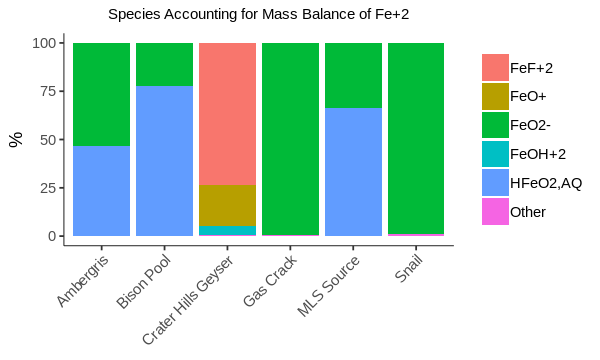

In [8]:
library(ggplot2)

# plot resizing options
options(repr.plot.width=5, repr.plot.height=3)

# create ggplot
g <- ggplot(df_spec, aes(fill=species, y=percent, x=sample)) + 
    geom_bar(stat="identity") +
    ylab("%") +
    ggtitle(paste("Species Accounting for Mass Balance of", this_basis)) +
    theme(axis.line=element_line(colour = "black", size=0.25, linetype = "solid"),
          axis.text.x=element_text(angle=45, vjust=1, hjust=1),
          axis.title.x=element_blank(),
          panel.grid.major=element_blank(), panel.grid.minor=element_blank(),
          panel.background = element_blank(),
          legend.key=element_rect(fill=NA, color=NA),
          legend.title=element_blank(),
          plot.title = element_text(size=9, hjust=0.5)) +
    guides(color=guide_legend(override.aes=list(fill=NA)))

print(g)

In [9]:
# # interactive plot
# library(plotly)
# ggplotly(g, height=300, width=500)

In [10]:
sessionInfo()

R version 3.6.1 (2019-07-05)
Platform: x86_64-conda_cos6-linux-gnu (64-bit)
Running under: Ubuntu 20.04.1 LTS

Matrix products: default
BLAS/LAPACK: /opt/conda/envs/R/lib/R/lib/libRblas.so

locale:
[1] C.UTF-8

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] ggplot2_3.1.1   reticulate_1.12 dplyr_0.8.0.1   CHNOSZ_1.4.0   

loaded via a namespace (and not attached):
 [1] Rcpp_1.0.1       magrittr_1.5     munsell_0.5.0    tidyselect_0.2.5
 [5] uuid_0.1-2       colorspace_1.4-1 lattice_0.20-38  R6_2.4.0        
 [9] rlang_0.3.4      plyr_1.8.4       tools_3.6.1      grid_3.6.1      
[13] gtable_0.3.0     withr_2.1.2      htmltools_0.3.6  lazyeval_0.2.2  
[17] digest_0.6.18    assertthat_0.2.1 tibble_2.1.1     crayon_1.3.4    
[21] Matrix_1.2-17    IRdisplay_0.7.0  purrr_0.3.2      repr_0.19.2     
[25] base64enc_0.1-3  IRkernel_1.1.1   glue_1.3.1       evaluate_0.13   
[29] labeling_0.3     pbdZMQ_0.3-3     com